# **Absenteeism at Work**
Details about Project :

Abstract: The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

In [ ]:
pip install treeinterpreter

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import calendar
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error as MSE
from scipy.stats import spearmanr, pearsonr
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.cluster import hierarchy as hc
import scipy
from treeinterpreter import treeinterpreter as ti
from collections import Counter
from sklearn.metrics import f1_score, precision_score, recall_score

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Absenteeism_at_work.csv to Absenteeism_at_work.csv


In [ ]:
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

The above results shows that this dataset has just 740 rows with the size of 121.5 KB. One of the column "Work load Average/day" has forward slash and we are replacing to avoid unnecessary errors in future.


In [ ]:
df.columns = df.columns.str.replace('/', 'per').str.strip()

Let us check the data quickly to understand the contents. ID is the unique employee id in the dataset. The below command returns the count of rows for each ID from the dataset.


In [ ]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Averageperday', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [ ]:
df.groupby('ID')[['ID']].count()

ID
ID     
1    23
2     6
3   113
4     1
5    19
6     8
7     6
8     2
9     8
10   24
11   40
12    7
13   15
14   29
15   37
16    2
17   20
18   16
19    3
20   42
21    3
22   46
23    8
24   30
25   10
26    5
27    7
28   76
29    5
30    7
31    3
32    5
33   24
34   55
35    1
36   34

The above results shows that this dataset is not a regular attendence dataset. This dataset only has absent hours of the employees for the period.

In [ ]:
df.describe(include = 'all')

ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service time         Age  Work load Averageperday  ...  \
count    740.000000  740.000000               740.000000  ...   
mean      12.554054   36.450000               271.490235  ...   
std        4.384873    6.478772                39.058116  ...   
min        1.000000   27.000000               205.917000  ...   
25%        9.000000   31.000000               244.387000  ...   
50%       13.000000   37.000000               264.249000  ...   
75%       16.000000   40.000000               294.217000  ...   
max       29.000000   58.000000               378.884000  ...   

       Disciplinary failure   Education         Son  Social drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social smoker         Pet      Weight      Height  Body mass index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism time in hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000  

[8 rows x 21 columns]

In [ ]:
df['Social drinker'] = df['Social drinker'].astype('bool')
df['Social smoker'] = df['Social smoker'].astype('bool')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('bool')
df['Seasons'] = df['Seasons'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Day of the week'] = df['Day of the week'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Reason for absence'] = df['Reason for absence'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    category
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Averageperday          740 non-null    float64 
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    bool    
 12  Educatio

In [ ]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Averageperday            0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
df[df['Month of absence']==0]

ID Reason for absence Month of absence Day of the week Seasons  \
737   4                  0                0               3       1   
738   8                  0                0               4       2   
739  35                  0                0               6       3   

     Transportation expense  Distance from Residence to Work  Service time  \
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Averageperday  ...  Disciplinary failure  Education Son  \
737   40                  271.219  ...                 False          1   1   
738   39                  271.219  ...                 False          1   2   
739   53                  271.219  ...                 False          1   1   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
737            True          False    8      98     170               34   
738            True          False    2     100     170               35   
739           False          False    1      77     175               25   

     Absenteeism time in hours  
737                          0  
738                          0  
739                          0  

[3 rows x 21 columns]

In [ ]:
df = df[df['Month of absence'] != 0]

In [ ]:
len(df[df['Absenteeism time in hours']==0])

41

In [ ]:
len(df[df['Disciplinary failure']==1])

40

In [ ]:
df[(df['Absenteeism time in hours']==0) & (df['Disciplinary failure']!=1)]

ID Reason for absence Month of absence Day of the week Seasons  \
134  34                 27                1               2       2   

     Transportation expense  Distance from Residence to Work  Service time  \
134                     118                               10            10   

     Age  Work load Averageperday  ...  Disciplinary failure  Education Son  \
134   37                  308.593  ...                 False          1   0   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
134           False          False    0      83     172               28   

     Absenteeism time in hours  
134                          0  

[1 rows x 21 columns]

In [ ]:
df[df['Reason for absence']==27][['Absenteeism time in hours']].mean()

Absenteeism time in hours    2.275362
dtype: float64

In [ ]:
df.loc[(df['Reason for absence']==27) & (df['Absenteeism time in hours']==0),'Absenteeism time in hours']=3

In [ ]:
df.loc[(df['Absenteeism time in hours']==0),'Absenteeism time in hours']=8

In [ ]:
len(df[df['Absenteeism time in hours']==0])

0

In [ ]:
season_mapping = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
df['season_name'] = df.Seasons.map(season_mapping)
df['season_name'] = df['season_name'].astype('category')
df.drop_duplicates(['Seasons', 'season_name'])[['Seasons','season_name']]

Seasons season_name
0         1      Summer
49        4      Spring
111       2      Autumn
175       3      Winter

In [ ]:
reason_mapping = {1:'Certain infectious and parasitic diseases', 2:'Neoplasms', 3:'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism', 4:' Endocrine, nutritional and metabolic diseases',5:'Mental and behavioural disorders', 6:'Diseases of the nervous system', 7:'Diseases of the eye and adnexa',
                  8:'Diseases of the ear and mastoid process',9:'Diseases of the circulatory system', 10:' Diseases of the respiratory system', 11:'Diseases of the digestive system',
                  12:'Diseases of the skin and subcutaneous tissue',13:'Diseases of the musculoskeletal system and connective tissue', 14:'Diseases of the genitourinary system',
                  15:'Pregnancy, childbirth and the puerperium', 16:'Certain conditions originating in the perinatal period',17:'Congenital malformations, deformations and chromosomal abnormalities',
                  18:'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified', 19:'Injury, poisoning and certain other consequences of external causes',
                  20:'External causes of morbidity and mortality',21:'Factors influencing health status and contact with health services.', 
                  22:'patient follow-up', 23:'medical consultation ', 24:'blood donation ',25:'laboratory examination', 26:'unjustified absence ', 27:'physiotherapy', 28:' dental consultation'}
df['reason_name'] = df['Reason for absence'].map(reason_mapping)
df['reason_name'] = df['reason_name'].astype('category')


In [ ]:
df['month_name'] =  df['Month of absence'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
week_mapping = {2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}
df['day_name'] = df['Day of the week'].map(week_mapping)
df['day_name'] = df['day_name'].astype('category')

In [ ]:
education_mapping = {
    1: 'High School',
    2: 'Graduate',
    3: 'Post Graduate',
    4: 'Master & Doctor'
}
education_list = {'High School', 'Graduate', 'Post Graduate', 'Master & Doctor'}
df['Education_detail'] = df['Education'].map(education_mapping)
category_education = pd.api.types.CategoricalDtype(categories=education_list, ordered=True)
df['Education_detail'] = df['Education_detail'].astype(category_education)

In [ ]:
df.head()

ID Reason for absence Month of absence Day of the week Seasons  \
0  11                 26                7               3       1   
1  36                  0                7               3       1   
2   3                 23                7               4       1   
3   7                  7                7               5       1   
4  11                 23                7               5       1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Averageperday  ...  Social drinker  Social smoker Pet  Weight  \
0                  239.554  ...            True          False   1      90   
1                  239.554  ...            True          False   0      98   
2                  239.554  ...            True          False   0      89   
3                  239.554  ...            True           True   0      68   
4                  239.554  ...            True          False   1      90   

   Height  Body mass index  Absenteeism time in hours  season_name  \
0     172               30                          4       Summer   
1     178               31                          8       Summer   
2     170               31                          2       Summer   
3     168               24                          4       Summer   
4     172               30                          2       Summer   

   month_name  Education_detail  
0         Jul       High School  
1         Jul       High School  
2         Jul       High School  
3         Jul       High School  
4         Jul       High School  

[5 rows x 24 columns]

Forward Selection

In [ ]:
df_features = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 
        'Distance from Residence to Work', 'Service time', 'Age', 'Work load Averageperday', 'Hit target',
        'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 
        'Height', 'Body mass index' ]]

In [ ]:
X = df_features
y = df['Absenteeism time in hours']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
!pip install mlxtend

In [ ]:
# Creating Classes for Classification
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)

In [ ]:
# Assigning the dependent and independent variables
X = df_features
y = df['abs_range']

In [ ]:
# Applying Sequential Feature Selector for Random Forest Classification
model = RandomForestClassifier()
k_list = range(5,19)
for k in k_list: 
  print('k :', k)
  sfs1 = sfs(model, k_features = k,  forward = True, verbose = 1, scoring = 'accuracy')
  sfs1 = sfs1.fit(X,y)
  feat_names = list(sfs1.k_feature_names_)
  print("-----------------------------------------------")
  print(feat_names)
  print("-----------------------------------------------")
  k = k + 1

k : 5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   34.6s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   29.4s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   18.5s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.4s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.9s finished
Features: 5/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-----------------------------------------------
['Reason for absence', 'Transportation expense', 'Disciplinary failure', 'Son', 'Social drinker']
-----------------------------------------------
k : 6


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.7s finished
Features: 1/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.9s finished
Features: 2/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   16.2s finished
Features: 3/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.4s finished
Features: 4/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.6s finished
Features: 5/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.9s finished
Features: 6/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-----------------------------------------------
['Reason for absence', 'Age', 'Disciplinary failure', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 7


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.9s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.9s finished
Features: 2/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   16.0s finished
Features: 3/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.5s finished
Features: 4/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.6s finished
Features: 5/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.8s finished
Features: 6/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 'Disciplinary failure', 'Social drinker', 'Pet', 'Weight']
-----------------------------------------------
k : 8


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.7s finished
Features: 1/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.8s finished
Features: 2/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   16.0s finished
Features: 3/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.3s finished
Features: 4/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.3s finished
Features: 5/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.7s finished
Features: 6/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Day of the week', 'Transportation expense', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 9


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.6s finished
Features: 1/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.7s finished
Features: 2/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   15.9s finished
Features: 3/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.8s finished
Features: 4/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.8s finished
Features: 5/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.8s finished
Features: 6/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Day of the week', 'Transportation expense', 'Service time', 'Social drinker', 'Social smoker', 'Pet', 'Height', 'Body mass index']
-----------------------------------------------
k : 10


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.6s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.8s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   16.3s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   16.1s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   15.1s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   14.1s finished
Features: 6/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Day of the week', 'Transportation expense', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 11


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.6s finished
Features: 1/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.8s finished
Features: 2/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   16.0s finished
Features: 3/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.5s finished
Features: 4/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.7s finished
Features: 5/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   14.0s finished
Features: 6/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Height']
-----------------------------------------------
k : 12


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.7s finished
Features: 1/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.8s finished
Features: 2/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   16.3s finished
Features: 3/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   16.0s finished
Features: 4/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.9s finished
Features: 5/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   14.2s finished
Features: 6/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Service time', 'Age', 'Hit target', 'Education', 'Son', 'Pet', 'Height']
-----------------------------------------------
k : 13


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.6s finished
Features: 1/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.8s finished
Features: 2/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   16.0s finished
Features: 3/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.3s finished
Features: 4/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.6s finished
Features: 5/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.7s finished
Features: 6/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Transportation expense', 'Service time', 'Age', 'Disciplinary failure', 'Son', 'Social drinker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------
k : 14


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.6s finished
Features: 1/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.7s finished
Features: 2/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   16.0s finished
Features: 3/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.4s finished
Features: 4/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.5s finished
Features: 5/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.6s finished
Features: 6/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Weight', 'Body mass index']
-----------------------------------------------
k : 15


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.5s finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.7s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   15.8s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.1s finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.1s finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.5s finished
Features: 6/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Height', 'Body mass index']
-----------------------------------------------
k : 16


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.2s finished
Features: 1/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.4s finished
Features: 2/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   15.6s finished
Features: 3/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.0s finished
Features: 4/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.0s finished
Features: 5/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.3s finished
Features: 6/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height']
-----------------------------------------------
k : 17


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.2s finished
Features: 1/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.4s finished
Features: 2/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   15.6s finished
Features: 3/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.0s finished
Features: 4/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.3s finished
Features: 5/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.3s finished
Features: 6/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Averageperday', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 18


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.2s finished
Features: 1/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.3s finished
Features: 2/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   15.6s finished
Features: 3/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   15.1s finished
Features: 4/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.2s finished
Features: 5/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.3s finished
Features: 6/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------


**Random Forest Classification**

In [ ]:
# Printing the Metrics Dictionary of Sequential Feature Selector
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

feature_idx  \
1                                                (0,)   
2                                             (0, 13)   
3                                         (0, 10, 13)   
4                                     (0, 10, 13, 15)   
5                                 (0, 10, 11, 13, 15)   
6                             (0, 10, 11, 13, 15, 17)   
7                          (0, 2, 10, 11, 13, 15, 17)   
8                       (0, 2, 4, 10, 11, 13, 15, 17)   
9                    (0, 2, 4, 7, 10, 11, 13, 15, 17)   
10                (0, 2, 4, 6, 7, 10, 11, 13, 15, 17)   
11             (0, 1, 2, 4, 6, 7, 10, 11, 13, 15, 17)   
12          (0, 1, 2, 3, 4, 6, 7, 10, 11, 13, 15, 17)   
13       (0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 13, 15, 17)   
14   (0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 15, 17)   
15  (0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 15, 1...   
16  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15...   
17  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...   
18  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...   

                                            cv_scores avg_score  \
1   [0.7635135135135135, 0.75, 0.7687074829931972,...  0.736716   
2   [0.7905405405405406, 0.7567567567567568, 0.789...  0.754357   
3   [0.7702702702702703, 0.7297297297297297, 0.795...   0.74898   
4   [0.7702702702702703, 0.7297297297297297, 0.829...  0.746259   
5   [0.8040540540540541, 0.722972972972973, 0.8027...  0.738058   
6   [0.8243243243243243, 0.6891891891891891, 0.809...  0.742158   
7   [0.8040540540540541, 0.7094594594594594, 0.789...  0.733995   
8   [0.777027027027027, 0.6891891891891891, 0.8027...  0.731338   
9   [0.8108108108108109, 0.7162162162162162, 0.782...  0.746222   
10  [0.777027027027027, 0.6959459459459459, 0.7823...  0.736771   
11  [0.7635135135135135, 0.7094594594594594, 0.782...  0.729969   
12  [0.7567567567567568, 0.7297297297297297, 0.741...  0.727229   
13  [0.7837837837837838, 0.722972972972973, 0.7278...  0.734004   
14  [0.7837837837837838, 0.6959459459459459, 0.761...   0.72996   
15  [0.7702702702702703, 0.6891891891891891, 0.748...  0.727266   
16  [0.7837837837837838, 0.7027027027027027, 0.727...  0.720427   
17  [0.8040540540540541, 0.6959459459459459, 0.741...  0.721769   
18  [0.7702702702702703, 0.7094594594594594, 0.755...  0.725878   

                                        feature_names  ci_bound   std_dev  \
1                               (Reason for absence,)  0.039018  0.030357   
2                (Reason for absence, Social drinker)   0.04232  0.032927   
3   (Reason for absence, Disciplinary failure, Soc...  0.037471  0.029154   
4   (Reason for absence, Disciplinary failure, Soc...  0.062981  0.049002   
5   (Reason for absence, Disciplinary failure, Edu...  0.071643  0.055741   
6   (Reason for absence, Disciplinary failure, Edu...  0.080452  0.062594   
7   (Reason for absence, Day of the week, Discipli...  0.068475  0.053276   
8   (Reason for absence, Day of the week, Transpor...  0.070628  0.054951   
9   (Reason for absence, Day of the week, Transpor...  0.054773  0.042615   
10  (Reason for absence, Day of the week, Transpor...  0.047199  0.036722   
11  (Reason for absence, Month of absence, Day of ...   0.04615  0.035906   
12  (Reason for absence, Month of absence, Day of ...  0.026816  0.020864   
13  (Reason for absence, Month of absence, Day of ...  0.037707  0.029337   
14  (Reason for absence, Month of absence, Day of ...  0.049937  0.038853   
15  (Reason for absence, Month of absence, Day of ...  0.040283  0.031342   
16  (Reason for absence, Month of absence, Day of ...  0.045128  0.035111   
17  (Reason for absence, Month of absence, Day of ...  0.061123  0.047556   
18  (Reason for absence, Month of absence, Day of ...   0.04188  0.032584   

     std_err  
1   0.015178  
2   0.016463  
3   0.014577  
4   0.024501  
5   0.027871  
6   0.031297  
7   0.026638  
8   0.027476  
9   0.021308  
10  0.018361  
11  0.017953  
12  0.010432  
13  0.014669  
14  0.0194

In [ ]:
# k = 18
# 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'

In [ ]:
X = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
#y = df['Absenteeism time in hours']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)

In [ ]:
y = df['abs_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
l=[]
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7432432432432432


In [ ]:
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))

0.723799786628734
0.7432432432432432
0.7299616788607916


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 17
X = df[['Reason for absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Averageperday', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7567567567567568
0.7367416618746406
0.7567567567567568
0.7424816286202425


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 16
X = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75
0.7447876447876448
0.75
0.7391797391797391


In [ ]:
# k = 15
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7635135135135135
0.7542997542997543
0.7635135135135135
0.750231602690619


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 14
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Weight', 'Body mass index']]
y = df['abs_range']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7162162162162162
0.6956735363588828
0.7162162162162162
0.704808221536846


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 13
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Transportation expense', 'Service time', 'Age', 'Disciplinary failure', 'Son', 'Social drinker', 'Pet', 'Weight', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7635135135135135
0.7662847178976211
0.7635135135135135
0.7613903580005275


In [ ]:
# k = 12
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Service time', 'Age', 'Hit target', 'Education', 'Son', 'Pet', 'Height']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75
0.7387609951519726
0.75
0.7386688635807256


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 11
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Height']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.777027027027027
0.7772857964347326
0.777027027027027
0.7725008782968512


In [ ]:
# k = 10
X =df[['Reason for absence', 'Day of the week', 'Transportation expense', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7567567567567568
0.7637470650830374
0.7567567567567568
0.7553746727151107


In [ ]:
# k = 9
X = df[['Reason for absence', 'Day of the week', 'Transportation expense', 'Service time', 'Social drinker', 'Social smoker', 'Pet', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7635135135135135
0.7661800596583206
0.7635135135135135
0.7624324324324324


In [ ]:
# k = 8
X = df[['Reason for absence', 'Day of the week', 'Transportation expense', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.777027027027027
0.7800058624526709
0.777027027027027
0.774111029167209


In [ ]:
# k = 7
X = df[['Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 'Disciplinary failure', 'Social drinker', 'Pet', 'Weight']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7297297297297297
0.7478475824711243
0.7297297297297297
0.7329694527062948


In [ ]:
# k = 6
X = df[['Reason for absence', 'Age', 'Disciplinary failure', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7432432432432432
0.7455318221447254
0.7432432432432432
0.7405718586105995


In [ ]:
# k = 5
X = df[['Reason for absence', 'Transportation expense', 'Disciplinary failure', 'Son', 'Social drinker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7297297297297297
0.7371341387470419
0.7297297297297297
0.7282361810963505


In [ ]:
# Printing the Best Accuracy with Number of Features
print("Max Random Forest Classification Accuracy: ", max(l), " with ", len(l)-l.index((max(l))) +4, "variables")

Max Random Forest Classification Accuracy:  0.777027027027027  with  11 variables


**Decision Tree Classification**

In [ ]:
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)
X = df_features
y = df['abs_range']

In [ ]:
# Applying Sequential Feature Selector for Decision Tree Classifier
from sklearn import tree
model = tree.DecisionTreeClassifier()
k_list = range(5,19)
for k in k_list: 
  print('k :', k)
  sfs1 = sfs(model, k_features = k,  forward = True, verbose = 1, scoring = 'accuracy')
  sfs1 = sfs1.fit(X,y)
  feat_names = list(sfs1.k_feature_names_)
  print("-----------------------------------------------")
  print(feat_names)
  print("-----------------------------------------------")
  k = k + 1

k : 5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 5/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-----------------------------------------------
['Reason for absence', 'Disciplinary failure', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 6


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 1/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished
Features: 4/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished
Features: 5/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-----------------------------------------------
['Reason for absence', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 7


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished
Features: 4/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 5/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Age', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 8


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 1/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 4/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 5/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 9


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 1/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 4/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 5/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 10


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight']
-----------------------------------------------
k : 11


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished
Features: 1/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished
Features: 4/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished
Features: 5/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 12


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished
Features: 1/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished
Features: 2/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 4/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 5/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Distance from Residence to Work', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 13


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 1/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 4/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished
Features: 5/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 14


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 1/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 4/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 5/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------
k : 15


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------
k : 16


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 1/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 4/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 5/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------
k : 17


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished
Features: 1/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 2/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 3/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished
Features: 4/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 5/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 6/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------
k : 18


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished
Features: 1/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
Features: 2/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished
Features: 3/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished
Features: 4/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished
Features: 5/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished
Features: 6/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------


In [ ]:
# Printing the Metrics Dictionary of Sequential Feature Selector
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

feature_idx  \
1                                                (0,)   
2                                             (0, 13)   
3                                         (0, 10, 13)   
4                                     (0, 10, 13, 15)   
5                                 (0, 10, 13, 14, 15)   
6                             (0, 10, 11, 13, 14, 15)   
7                          (0, 7, 10, 11, 13, 14, 15)   
8                      (0, 7, 10, 11, 12, 13, 14, 15)   
9                   (0, 6, 7, 10, 11, 12, 13, 14, 15)   
10               (0, 4, 6, 7, 10, 11, 12, 13, 14, 15)   
11           (0, 4, 6, 7, 10, 11, 12, 13, 14, 15, 17)   
12        (0, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 17)   
13    (0, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 17, 18)   
14  (0, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17...   
15  (0, 2, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16,...   
16  (0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...   
17  (0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...   
18  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...   

                                            cv_scores avg_score  \
1   [0.7635135135135135, 0.75, 0.8027210884353742,...  0.740798   
2   [0.7905405405405406, 0.7162162162162162, 0.789...  0.746249   
3   [0.7905405405405406, 0.7162162162162162, 0.789...  0.746249   
4   [0.7635135135135135, 0.7364864864864865, 0.782...  0.735374   
5   [0.7837837837837838, 0.7432432432432432, 0.782...  0.724453   
6   [0.7837837837837838, 0.7094594594594594, 0.789...   0.72586   
7   [0.7905405405405406, 0.6959459459459459, 0.782...  0.716345   
8   [0.7837837837837838, 0.7027027027027027, 0.782...  0.714984   
9   [0.7837837837837838, 0.6824324324324325, 0.789...   0.71093   
10  [0.7972972972972973, 0.6824324324324325, 0.761...  0.714994   
11  [0.7905405405405406, 0.668918918918919, 0.7551...  0.704137   
12  [0.7837837837837838, 0.6554054054054054, 0.748...  0.701443   
13  [0.7972972972972973, 0.6621621621621622, 0.755...  0.705497   
14  [0.7837837837837838, 0.668918918918919, 0.7551...  0.700064   
15  [0.7567567567567568, 0.6554054054054054, 0.680...  0.682432   
16  [0.7297297297297297, 0.6486486486486487, 0.659...  0.668873   
17  [0.7635135135135135, 0.6418918918918919, 0.680...  0.674278   
18  [0.7297297297297297, 0.6081081081081081, 0.687...  0.659404   

                                        feature_names  ci_bound   std_dev  \
1                               (Reason for absence,)  0.054038  0.042043   
2                (Reason for absence, Social drinker)  0.046488  0.036169   
3   (Reason for absence, Disciplinary failure, Soc...  0.046488  0.036169   
4   (Reason for absence, Disciplinary failure, Soc...  0.044919  0.034949   
5   (Reason for absence, Disciplinary failure, Soc...  0.073811  0.057427   
6   (Reason for absence, Disciplinary failure, Edu...  0.065826  0.051215   
7   (Reason for absence, Age, Disciplinary failure...  0.075969  0.059106   
8   (Reason for absence, Age, Disciplinary failure...  0.075135  0.058457   
9   (Reason for absence, Service time, Age, Discip...  0.081185  0.063165   
10  (Reason for absence, Transportation expense, S...  0.069923  0.054403   
11  (Reason for absence, Transportation expense, S...  0.074088  0.057643   
12  (Reason for absence, Transportation expense, D...  0.069561  0.054121   
13  (Reason for absence, Transportation expense, D...  0.076651  0.059637   
14  (Reason for absence, Transportation expense, D...  0.074704  0.058122   
15  (Reason for absence, Day of the week, Transpor...  0.049037  0.038152   
16  (Reason for absence, Day of the week, Transpor...  0.055219  0.042963   
17  (Reason for absence, Month of absence, Day of ...   0.06041  0.047001   
18  (Reason for absence, Month of absence, Day of ...   0.05644  0.043912   

     std_err  
1   0.021022  
2   0.018085  
3   0.018085  
4   0.017474  
5   0.028714  
6   0.025608  
7   0.029553  
8   0.029229  
9   0.031583  
10  0.027201  
11  0.028821  
12   0.02706  
13  0.029818  
14  0.0290

In [ ]:
# k = 18
# 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'
X = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
l=[]
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7364864864864865
0.7509198273904157
0.7364864864864865
0.7428755233086825


In [ ]:
# k = 17
X = df[['Reason for absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7702702702702703
0.7817270794798884
0.7702702702702703
0.7728554674097723


In [ ]:
# k = 16
X=df[['Reason for absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7297297297297297
0.7580671580671581
0.7297297297297297
0.7412311133241365


In [ ]:
# k = 15
X =df[['Reason for absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7162162162162162
0.7325552825552825
0.7162162162162162
0.7218698614047451


In [ ]:
# k = 14
X =df[['Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7432432432432432
0.7695695434132853
0.7432432432432432
0.7526834279323966


In [ ]:
# k = 13
X =df[['Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.722972972972973
0.7618685204051058
0.722972972972973
0.7373192041490695


In [ ]:
# k = 12
X =df[['Reason for absence', 'Distance from Residence to Work', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7297297297297297
0.7596933471933472
0.7297297297297297
0.7381930867037251


In [ ]:
# k = 11
X =df[['Reason for absence', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7297297297297297
0.7596933471933472
0.7297297297297297
0.7381930867037251


In [ ]:
# k = 10
X =df[['Reason for absence', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7432432432432432
0.7801801801801802
0.7432432432432432
0.7552012761110339


In [ ]:
# k = 9
X = df[['Reason for absence', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7162162162162162
0.753418395101048
0.7162162162162162
0.7298285919914796


In [ ]:
# k = 8
X = df[['Reason for absence', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.722972972972973
0.7608273858273857
0.722972972972973
0.7377343143417016


In [ ]:
# k = 7
X = df[['Reason for absence', 'Age', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7297297297297297
0.7619271445358402
0.7297297297297297
0.7392048721835954


In [ ]:
# k = 6
X = df[['Reason for absence', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7027027027027027
0.7283783783783784
0.7027027027027027
0.7021479128220701


In [ ]:
# k = 5
X = df[['Reason for absence', 'Disciplinary failure', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7094594594594594
0.7335294117647059
0.7094594594594594
0.705680482854396


In [ ]:
# Printing the Best Accuracy with Number of Features
print("Max Decision Tree Classification Accuracy: ", max(l), " with ", len(l)-l.index((max(l))) +4, "variables")

Max Decision Tree Classification Accuracy:  0.7702702702702703  with  17 variables


Logistic Regression

In [ ]:
X = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)
y = df['abs_range']

In [ ]:
# Applying Sequential Feature Selector for Logistic Regression 
model = LogisticRegression()
k_list = range(5,19)
for k in k_list: 
  print('k :', k)
  sfs1 = sfs(model, k_features = k,  forward = True, verbose = 1, scoring = 'accuracy')
  sfs1 = sfs1.fit(X,y)
  feat_names = list(sfs1.k_feature_names_)
  print("-----------------------------------------------")
  print(feat_names)
  print("-----------------------------------------------")
  k = k + 1

k : 5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.0s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or

-----------------------------------------------
['Reason for absence', 'Seasons', 'Transportation expense', 'Disciplinary failure', 'Social drinker']
-----------------------------------------------
k : 6


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.7s finished
Features: 1/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

-----------------------------------------------
['Reason for absence', 'Seasons', 'Transportation expense', 'Disciplinary failure', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 7


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.7s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

-----------------------------------------------
['Reason for absence', 'Seasons', 'Transportation expense', 'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 8


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

-----------------------------------------------
['Reason for absence', 'Seasons', 'Transportation expense', 'Service time', 'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 9


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.7s finished
Features: 1/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

-----------------------------------------------
['Reason for absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 10


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.7s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproc

-----------------------------------------------
['Reason for absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 11


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.7s finished
Features: 1/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproc

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 12


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproc

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 13


Streaming output truncated to the last 5000 lines.
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 14


Streaming output truncated to the last 5000 lines.
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 15


Streaming output truncated to the last 5000 lines.
Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 16


Streaming output truncated to the last 5000 lines.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations 

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Height']
-----------------------------------------------
k : 17


Streaming output truncated to the last 5000 lines.
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height']
-----------------------------------------------
k : 18


Streaming output truncated to the last 5000 lines.
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# k = 18
# 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
l=[]
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7027027027027027
0.6535409792290526
0.7027027027027027
0.6647347665231671


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 17
X=df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6959459459459459
0.6448240693523712
0.6959459459459459
0.6609174964438121


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 16
X = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Height']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7027027027027027
0.652101383680331
0.7027027027027027
0.662622505966298


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 15
X=df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6959459459459459
0.7134063463850697
0.6959459459459459
0.7021841090457254


In [ ]:
# k = 14
X=df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

Accuracy: 0.6959459459459459
0.6453615777940103
0.6959459459459459
0.6545292545292544


In [ ]:
# k = 13
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6959459459459459
0.6486486486486487
0.6959459459459459
0.6544401544401545


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 12
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6959459459459459
0.6486486486486487
0.6959459459459459
0.6544401544401545


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 11
X =df[['Reason for absence', 'Month of absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6891891891891891
0.6419653534697783
0.6891891891891891
0.6462254189397291


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 10
X =df[['Reason for absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6959459459459459
0.6508660363149528
0.6959459459459459
0.6519246519246519


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 9
X = df[['Reason for absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6959459459459459
0.6508660363149528
0.6959459459459459
0.6519246519246519


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 8
X = df[['Reason for absence', 'Seasons', 'Transportation expense', 'Service time', 'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6756756756756757
0.6252739225712199
0.6756756756756757
0.6348678348678348


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 7
X = df[['Reason for absence', 'Seasons', 'Transportation expense', 'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7027027027027027
0.6535409792290526
0.7027027027027027
0.6647347665231671


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 6
X = df[['Reason for absence', 'Seasons', 'Transportation expense', 'Disciplinary failure', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7027027027027027
0.6535409792290526
0.7027027027027027
0.6647347665231671


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# k = 5
X = df[['Reason for absence', 'Seasons', 'Transportation expense', 'Disciplinary failure', 'Social drinker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6959459459459459
0.650109569028488
0.6959459459459459
0.6567270567270567


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and 

In [ ]:
# Printing the Best Accuracy with Number of Features
print("Max Logistic Regression Accuracy: ", max(l), " with ", len(l)-l.index((max(l))) +4, "variables")

Max Logistic Regression Accuracy:  0.7027027027027027  with  18 variables


K Nearest Neighbors Classification

In [ ]:
X = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)
y = df['abs_range']

In [ ]:
# Applying Sequential Feature Selector for K Nearest Neighbors Classifier
model = KNeighborsClassifier()
k_list = range(5,19)
for k in k_list: 
  print('k :', k)
  sfs1 = sfs(model, k_features = k,  forward = True, verbose = 1, scoring = 'accuracy')
  sfs1 = sfs1.fit(X,y)
  feat_names = list(sfs1.k_feature_names_)
  print("-----------------------------------------------")
  print(feat_names)
  print("-----------------------------------------------")
  k = k + 1

k : 5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.1s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.0s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.0s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.9s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished
Features: 5/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-----------------------------------------------
['Reason for absence', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 6


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.7s finished
Features: 1/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.4s finished
Features: 2/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.2s finished
Features: 3/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.6s finished
Features: 4/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.6s finished
Features: 5/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-----------------------------------------------
['Reason for absence', 'Service time', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 7


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    2.1s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.0s finished
Features: 2/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.4s finished
Features: 3/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.2s finished
Features: 4/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.7s finished
Features: 6/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker']
-----------------------------------------------
k : 8


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.9s finished
Features: 1/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.9s finished
Features: 2/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.4s finished
Features: 3/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.3s finished
Features: 4/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.5s finished
Features: 5/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.3s finished
Features: 6/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
-----------------------------------------------
k : 9


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.7s finished
Features: 1/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.5s finished
Features: 3/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.0s finished
Features: 5/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.0s finished
Features: 6/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight']
-----------------------------------------------
k : 10


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.1s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.1s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.9s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.8s finished
Features: 6/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 11


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.1s finished
Features: 1/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.0s finished
Features: 2/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.0s finished
Features: 3/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.0s finished
Features: 4/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished
Features: 5/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.9s finished
Features: 6/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Day of the week', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 12


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.1s finished
Features: 1/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.0s finished
Features: 2/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.0s finished
Features: 3/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.0s finished
Features: 4/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished
Features: 5/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.9s finished
Features: 6/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 13


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 1/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.0s finished
Features: 2/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.0s finished
Features: 3/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.0s finished
Features: 4/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished
Features: 5/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.9s finished
Features: 6/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------
k : 14


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.2s finished
Features: 1/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.1s finished
Features: 2/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.0s finished
Features: 3/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.0s finished
Features: 4/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished
Features: 5/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.9s finished
Features: 6/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------
k : 15


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.6s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s finished
Features: 6/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------
k : 16


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s finished
Features: 1/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.6s finished
Features: 2/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished
Features: 3/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished
Features: 4/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s finished
Features: 5/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s finished
Features: 6/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------
k : 17


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s finished
Features: 1/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.6s finished
Features: 2/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished
Features: 3/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished
Features: 4/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s finished
Features: 5/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s finished
Features: 6/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------
k : 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s finished
Features: 1/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.7s finished
Features: 2/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished
Features: 3/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished
Features: 4/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished
Features: 5/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s finished
Features: 6/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# k = 18
# 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'
X=df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
l=[]
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6959459459459459
0.6926888691594574
0.6959459459459459
0.6797657427366895


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 17
X=df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6756756756756757
0.6709920147420148
0.6756756756756757
0.6541951988708415


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 16
X=df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7027027027027027
0.6968092170794873
0.7027027027027027
0.6882548615958226


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 15
X=df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Service time', 'Age', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7094594594594594
0.7098517284160848
0.7094594594594594
0.6961785398485255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 14
X=df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


Accuracy: 0.7027027027027027
0.7017352579852579
0.7027027027027027
0.6947963641132734


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
# k = 13
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7297297297297297
0.7287057676232933
0.7297297297297297
0.7212703475780942


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
# k = 12
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.722972972972973
0.7140506560719327
0.722972972972973
0.7143838403870507


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 11
X =df[['Reason for absence', 'Day of the week', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


Accuracy: 0.7094594594594594
0.7089206658087948
0.7094594594594594
0.7061114706779446


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 10
X =df[['Reason for absence', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7432432432432432
0.743392799914539
0.7432432432432432
0.7405788002158239


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
# k = 9
X = df[['Reason for absence', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75
0.7480611045828437
0.75
0.7459645852749301


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 8
X = df[['Reason for absence', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7567567567567568
0.762347620493688
0.7567567567567568
0.7581609491164064


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
# k = 7
X = df[['Reason for absence', 'Service time', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7567567567567568
0.7623190557973166
0.7567567567567568
0.7570270270270272


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
# k = 6
X = df[['Reason for absence', 'Service time', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7432432432432432
0.7562930469907214
0.7432432432432432
0.7453282691264244


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
# k = 5
X = df[['Reason for absence', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.777027027027027
0.7724606049348318
0.777027027027027
0.7679401553812507


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Printing the Best Accuracy with Number of Features
print("Max K Nearest Neighbors Classification Accuracy: ", max(l), " with ", len(l)-l.index((max(l))) +4, "variables")

Max K Nearest Neighbors Classification Accuracy:  0.777027027027027  with  5 variables


Support Vector Machine Classification

In [ ]:
X = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)
y = df['abs_range']

In [ ]:
# Applying Sequential Feature Selector for Support Vector Machine Classifier
model = SVC()
k_list = range(5,19)
for k in k_list: 
  print('k :', k)
  sfs1 = sfs(model, k_features = k,  forward = True, verbose = 1, scoring = 'accuracy')
  sfs1 = sfs1.fit(X,y)
  feat_names = list(sfs1.k_feature_names_)
  print("-----------------------------------------------")
  print(feat_names)
  print("-----------------------------------------------")
  k = k + 1

k : 5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-----------------------------------------------
['Reason for absence', 'Distance from Residence to Work', 'Service time', 'Age', 'Body mass index']
-----------------------------------------------
k : 6


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-----------------------------------------------
['Reason for absence', 'Distance from Residence to Work', 'Service time', 'Age', 'Weight', 'Body mass index']
-----------------------------------------------
k : 7


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.9s finished
Features: 1/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.3s finished
Features: 3/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Distance from Residence to Work', 'Service time', 'Age', 'Weight', 'Body mass index']
-----------------------------------------------
k : 8


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    2.7s finished
Features: 1/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Weight', 'Body mass index']
-----------------------------------------------
k : 9


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.7s finished
Features: 4/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Weight', 'Body mass index']
-----------------------------------------------
k : 10


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Weight', 'Body mass index']
-----------------------------------------------
k : 11


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Disciplinary failure', 'Weight', 'Body mass index']
-----------------------------------------------
k : 12


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.7s finished
Features: 4/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Weight', 'Body mass index']
-----------------------------------------------
k : 13


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 14


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 15


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 16


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.9s finished
Features: 1/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 17


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 1/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']
-----------------------------------------------
k : 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.9s finished
Features: 1/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 2/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.9s finished
Features: 3/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 4/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished
Features: 5/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished
Features: 6/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

-----------------------------------------------
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
-----------------------------------------------


In [ ]:
from sklearn.svm import SVC

In [ ]:
# k = 18
# 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'
X = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
l=[]
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6148648648648649
0.5881496881496882
0.6148648648648649
0.5406668350593585


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 17
X = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6554054054054054
0.6272379696769941
0.6554054054054054
0.5994833578763132


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 16
X=df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6554054054054054
0.6272379696769941
0.6554054054054054
0.5994833578763132


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 15
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6554054054054054
0.6272379696769941
0.6554054054054054
0.5994833578763132


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 14
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Education', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6621621621621622
0.6341552775979006
0.6621621621621622


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6086296247704015


In [ ]:
# k = 13
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Pet', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6621621621621622
0.6341552775979006


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6621621621621622
0.6086296247704015


In [ ]:
# k = 12
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Hit target', 'Disciplinary failure', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6621621621621622
0.6341552775979006
0.6621621621621622
0.6086296247704015


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 11
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Disciplinary failure', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6621621621621622
0.6341552775979006
0.6621621621621622
0.6086296247704015


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 10
X =df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6621621621621622
0.6341552775979006
0.6621621621621622
0.6086296247704015


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 9
X = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6621621621621622
0.6341552775979006
0.6621621621621622
0.6086296247704015


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 8
X = df[['Reason for absence', 'Month of absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6621621621621622
0.6341552775979006
0.6621621621621622
0.6086296247704015


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 7
X = df[['Reason for absence', 'Month of absence', 'Distance from Residence to Work', 'Service time', 'Age', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6621621621621622
0.6122102339493644
0.6621621621621622
0.6153648016410103


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 6
X = df[['Reason for absence', 'Distance from Residence to Work', 'Service time', 'Age', 'Weight', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6621621621621622
0.6102994886778671
0.6621621621621622
0.621027621027621


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# k = 5
X = df[['Reason for absence', 'Distance from Residence to Work', 'Service time', 'Age', 'Body mass index']]
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'weighted'))
print(f1_score(y_test, y_pred, average = 'weighted'))
l.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.668918918918919
0.6169294294294294
0.668918918918919
0.6315770557791835


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Printing the Best Accuracy with Number of Features
print("Max Support Vector Machine Classification Accuracy: ", max(l), " with ", len(l)-l.index((max(l))) +4, "variables")

Max Support Vector Machine Classification Accuracy:  0.668918918918919  with  5 variables


In [ ]:
# import pandas as pd
# import numpy as np

# Plotting the Correlation Matrix/ Heat Map of all variables

# corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """


## **Feature Selection:**

In [ ]:
# df = pd.read_csv('Absenteeism_at_work.csv', sep=';')

In [ ]:
# df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [ ]:
# X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values
# y=df.iloc[:,20].values


In [ ]:
# import statsmodels.api as sm
# X_be1 = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.315
Method:                 Least Squares   F-statistic:                              18.93
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    2.05e-51
Time:                        19:33:40   Log-Likelihood:                         -2904.9
No. Observations:                 740   AIC:                                      5848.
Df Residuals:                     721   BIC:                                      5935.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4936      0.068     -7.286      0.000      -0.627      -0.361
x2             0.1517      0.176      0.864      0.388      -0.193       0.496
x3            -0.9259      0.334     -2.776      0.006      -1.581      -0.271
x4            -0.0724      0.484     -0.150      0.881      -1.022       0.878
x5             0.0061      0.009      0.681      0.496      -0.012       0.024
x6            -0.0408      0.049     -0.835      0.404      -0.137       0.055
x7             0.0245      0.190      0.129      0.897      -0.348       0.397
x8             0.1752      0.112      1.558      0.120      -0.046       0.396
x9            -0.0047      0.013     -0.364      0.716      -0.030       0.021
x10            0.1261      0.142      0.889      0.374      -0.152       0.405
x11          -18.1697      2.498     -7.273      0.000     -23.074     -13.265
x12           -1.3015      0.823     -1.581      0.114      -2.918       0.315
x13            1.0215      0.491      2.082      0.038       0.058       1.985
x14            1.6895      1.453      1.163      0.245      -1.162       4.541
x15           -2.0958      1.953     -1.073      0.284      -5.930       1.738
x16           -0.2469      0.458     -0.540      0.590      -1.145       0.651
x17            0.1601      0.148      1.082      0.279      -0.130       0.450
x18            0.0569      0.094      0.607      0.544      -0.127       0.241
x19           -0.7376      0.416     -1.774      0.077      -1.554       0.079
==============================================================================
Omnibus:                      805.044   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42636.062
Skew:                           5.263   Prob(JB):                         0.00
Kurtosis:                      38.665   Cond. No.                     2.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# #x_7 is the most insignificant
# X_be1 = df.iloc[:,[1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.316
Method:                 Least Squares   F-statistic:                              20.01
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    4.53e-52
Time:                        19:34:18   Log-Likelihood:                         -2905.0
No. Observations:                 740   AIC:                                      5846.
Df Residuals:                     722   BIC:                                      5929.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4937      0.068     -7.292      0.000      -0.627      -0.361
x2             0.1510      0.175      0.861      0.390      -0.193       0.495
x3            -0.9262      0.333     -2.779      0.006      -1.581      -0.272
x4            -0.0678      0.482     -0.141      0.888      -1.014       0.879
x5             0.0059      0.009      0.669      0.504      -0.011       0.023
x6            -0.0386      0.046     -0.845      0.398      -0.128       0.051
x7             0.1835      0.093      1.981      0.048       0.002       0.365
x8            -0.0046      0.013     -0.354      0.724      -0.030       0.021
x9             0.1268      0.142      0.895      0.371      -0.151       0.405
x10          -18.1943      2.489     -7.309      0.000     -23.081     -13.307
x11           -1.2932      0.820     -1.577      0.115      -2.903       0.317
x12            1.0233      0.490      2.088      0.037       0.061       1.985
x13            1.7004      1.449      1.173      0.241      -1.145       4.546
x14           -2.0413      1.905     -1.071      0.284      -5.782       1.700
x15           -0.2724      0.413     -0.660      0.509      -1.082       0.537
x16            0.1630      0.146      1.115      0.265      -0.124       0.450
x17            0.0552      0.093      0.596      0.552      -0.127       0.237
x18           -0.7399      0.415     -1.782      0.075      -1.555       0.075
==============================================================================
Omnibus:                      805.165   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42674.749
Skew:                           5.265   Prob(JB):                         0.00
Kurtosis:                      38.682   Cond. No.                     2.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# #x_4 is the most insignificant
# X_be1 = df.iloc[:,[1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.317
Method:                 Least Squares   F-statistic:                              21.21
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    9.76e-53
Time:                        19:34:58   Log-Likelihood:                         -2905.0
No. Observations:                 740   AIC:                                      5844.
Df Residuals:                     723   BIC:                                      5922.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4936      0.068     -7.296      0.000      -0.626      -0.361
x2             0.1394      0.155      0.902      0.367      -0.164       0.443
x3            -0.9282      0.333     -2.789      0.005      -1.582      -0.275
x4             0.0060      0.009      0.677      0.498      -0.011       0.023
x5            -0.0383      0.046     -0.840      0.401      -0.128       0.051
x6             0.1837      0.093      1.985      0.048       0.002       0.365
x7            -0.0050      0.012     -0.408      0.684      -0.029       0.019
x8             0.1226      0.138      0.886      0.376      -0.149       0.394
x9           -18.2362      2.470     -7.384      0.000     -23.085     -13.388
x10           -1.2958      0.819     -1.581      0.114      -2.904       0.313
x11            1.0218      0.490      2.087      0.037       0.061       1.983
x12            1.6998      1.448      1.174      0.241      -1.143       4.543
x13           -2.0222      1.899     -1.065      0.287      -5.751       1.707
x14           -0.2727      0.412     -0.661      0.509      -1.082       0.537
x15            0.1616      0.146      1.109      0.268      -0.124       0.448
x16            0.0576      0.091      0.633      0.527      -0.121       0.236
x17           -0.7358      0.414     -1.778      0.076      -1.548       0.077
==============================================================================
Omnibus:                      805.200   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42682.459
Skew:                           5.265   Prob(JB):                         0.00
Kurtosis:                      38.685   Cond. No.                     2.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# #x_4 is the most insignificant
# X_be1 = df.iloc[:,[1,2,3,5,6,8,10,11,12,13,14,15,16,17,18,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              22.55
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    2.18e-53
Time:                        19:35:19   Log-Likelihood:                         -2905.0
No. Observations:                 740   AIC:                                      5842.
Df Residuals:                     724   BIC:                                      5916.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4903      0.067     -7.304      0.000      -0.622      -0.358
x2             0.1542      0.150      1.028      0.305      -0.140       0.449
x3            -0.9365      0.332     -2.821      0.005      -1.588      -0.285
x4             0.0058      0.009      0.664      0.507      -0.011       0.023
x5            -0.0381      0.046     -0.837      0.403      -0.128       0.051
x6             0.1842      0.092      1.992      0.047       0.003       0.366
x7             0.1327      0.136      0.975      0.330      -0.134       0.400
x8           -18.1946      2.466     -7.378      0.000     -23.036     -13.353
x9            -1.2474      0.810     -1.539      0.124      -2.838       0.343
x10            1.0201      0.489      2.085      0.037       0.059       1.981
x11            1.7414      1.444      1.206      0.228      -1.093       4.576
x12           -2.0129      1.898     -1.061      0.289      -5.739       1.713
x13           -0.2720      0.412     -0.660      0.509      -1.081       0.537
x14            0.1732      0.143      1.213      0.226      -0.107       0.454
x15            0.0422      0.083      0.510      0.610      -0.120       0.205
x16           -0.7659      0.407     -1.882      0.060      -1.565       0.033
==============================================================================
Omnibus:                      806.977   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43128.665
Skew:                           5.281   Prob(JB):                         0.00
Kurtosis:                      38.878   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# #x_15 is the most insignificant
# X_be1 = df.iloc[:,[1,2,3,5,6,8,10,11,12,13,14,15,16,17,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.332
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              24.06
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    4.95e-54
Time:                        19:35:48   Log-Likelihood:                         -2905.2
No. Observations:                 740   AIC:                                      5840.
Df Residuals:                     725   BIC:                                      5909.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4872      0.067     -7.291      0.000      -0.618      -0.356
x2             0.1881      0.134      1.399      0.162      -0.076       0.452
x3            -0.9309      0.332     -2.807      0.005      -1.582      -0.280
x4             0.0066      0.009      0.761      0.447      -0.010       0.024
x5            -0.0364      0.045     -0.802      0.423      -0.126       0.053
x6             0.1913      0.091      2.093      0.037       0.012       0.371
x7             0.1964      0.054      3.648      0.000       0.091       0.302
x8           -18.0723      2.453     -7.367      0.000     -22.888     -13.256
x9            -1.2098      0.807     -1.500      0.134      -2.793       0.374
x10            1.0103      0.489      2.067      0.039       0.051       1.970
x11            1.7196      1.442      1.192      0.234      -1.112       4.551
x12           -1.9835      1.896     -1.046      0.296      -5.706       1.739
x13           -0.2869      0.411     -0.698      0.485      -1.093       0.520
x14            0.2212      0.107      2.061      0.040       0.010       0.432
x15           -0.8916      0.324     -2.753      0.006      -1.527      -0.256
==============================================================================
Omnibus:                      805.729   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42846.543
Skew:                           5.269   Prob(JB):                         0.00
Kurtosis:                      38.757   Cond. No.                     1.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# #x_13 is the most insignificant
# X_be1 = df.iloc[:,[1,2,3,5,6,8,10,11,12,13,14,15,17,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.332
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              25.76
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    1.21e-54
Time:                        19:36:24   Log-Likelihood:                         -2905.4
No. Observations:                 740   AIC:                                      5839.
Df Residuals:                     726   BIC:                                      5903.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4858      0.067     -7.276      0.000      -0.617      -0.355
x2             0.1876      0.134      1.395      0.163      -0.076       0.451
x3            -0.9228      0.331     -2.785      0.005      -1.573      -0.272
x4             0.0044      0.008      0.547      0.584      -0.011       0.020
x5            -0.0445      0.044     -1.014      0.311      -0.131       0.042
x6             0.1969      0.091      2.163      0.031       0.018       0.376
x7             0.1993      0.054      3.715      0.000       0.094       0.305
x8           -18.0315      2.452     -7.355      0.000     -22.845     -13.218
x9            -1.1372      0.800     -1.422      0.155      -2.707       0.432
x10            1.0059      0.488      2.059      0.040       0.047       1.965
x11            2.0352      1.369      1.486      0.138      -0.653       4.723
x12           -2.1400      1.882     -1.137      0.256      -5.835       1.555
x13            0.2076      0.106      1.967      0.050       0.000       0.415
x14           -0.8620      0.321     -2.686      0.007      -1.492      -0.232
==============================================================================
Omnibus:                      804.376   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42510.481
Skew:                           5.257   Prob(JB):                         0.00
Kurtosis:                      38.612   Cond. No.                     1.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# #x_4 is the most insignificant
# X_be1 = df.iloc[:,[1,2,3,6,8,10,11,12,13,14,15,17,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.332
Model:                            OLS   Adj. R-squared (uncentered):              0.320
Method:                 Least Squares   F-statistic:                              27.75
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    2.59e-55
Time:                        19:37:22   Log-Likelihood:                         -2905.6
No. Observations:                 740   AIC:                                      5837.
Df Residuals:                     727   BIC:                                      5897.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4901      0.066     -7.393      0.000      -0.620      -0.360
x2             0.2012      0.132      1.523      0.128      -0.058       0.460
x3            -0.9258      0.331     -2.796      0.005      -1.576      -0.276
x4            -0.0420      0.044     -0.962      0.336      -0.128       0.044
x5             0.1855      0.089      2.095      0.037       0.012       0.359
x6             0.2112      0.049      4.303      0.000       0.115       0.307
x7           -17.9675      2.448     -7.341      0.000     -22.773     -13.162
x8            -1.1012      0.796     -1.383      0.167      -2.665       0.462
x9             1.1026      0.455      2.422      0.016       0.209       1.996
x10            2.1234      1.359      1.562      0.119      -0.545       4.792
x11           -2.1174      1.881     -1.126      0.261      -5.810       1.575
x12            0.1973      0.104      1.901      0.058      -0.006       0.401
x13           -0.8314      0.316     -2.632      0.009      -1.451      -0.211
==============================================================================
Omnibus:                      803.260   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42305.251
Skew:                           5.246   Prob(JB):                         0.00
Kurtosis:                      38.525   Cond. No.                         740.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# #x_4 is the most insignificant
# X_be1 = df.iloc[:,[1,2,3,8,10,11,12,13,14,15,17,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.331
Model:                            OLS   Adj. R-squared (uncentered):              0.320
Method:                 Least Squares   F-statistic:                              29.99
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    7.23e-56
Time:                        19:37:39   Log-Likelihood:                         -2906.1
No. Observations:                 740   AIC:                                      5836.
Df Residuals:                     728   BIC:                                      5891.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4919      0.066     -7.425      0.000      -0.622      -0.362
x2             0.2011      0.132      1.523      0.128      -0.058       0.460
x3            -0.9560      0.330     -2.900      0.004      -1.603      -0.309
x4             0.2150      0.083      2.588      0.010       0.052       0.378
x5             0.1914      0.045      4.296      0.000       0.104       0.279
x6           -17.8860      2.446     -7.312      0.000     -22.688     -13.084
x7            -1.0649      0.795     -1.339      0.181      -2.627       0.497
x8             1.1385      0.454      2.510      0.012       0.248       2.029
x9             1.3702      1.111      1.233      0.218      -0.811       3.551
x10           -2.1926      1.879     -1.167      0.244      -5.882       1.497
x11            0.2510      0.087      2.870      0.004       0.079       0.423
x12           -0.9887      0.270     -3.659      0.000      -1.519      -0.458
==============================================================================
Omnibus:                      802.910   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42168.929
Skew:                           5.243   Prob(JB):                         0.00
Kurtosis:                      38.464   Cond. No.                         721.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# #x_10 is the most insignificant
# X_be1 = df.iloc[:,[1,2,3,8,10,11,12,13,14,17,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.330
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              32.57
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    2.39e-56
Time:                        19:37:59   Log-Likelihood:                         -2906.7
No. Observations:                 740   AIC:                                      5835.
Df Residuals:                     729   BIC:                                      5886.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4904      0.066     -7.401      0.000      -0.620      -0.360
x2             0.2057      0.132      1.558      0.120      -0.054       0.465
x3            -0.9474      0.330     -2.874      0.004      -1.595      -0.300
x4             0.1930      0.081      2.384      0.017       0.034       0.352
x5             0.1860      0.044      4.197      0.000       0.099       0.273
x6           -18.1473      2.436     -7.449      0.000     -22.930     -13.364
x7            -1.0350      0.795     -1.302      0.193      -2.596       0.526
x8             1.0808      0.451      2.396      0.017       0.195       1.966
x9             1.4890      1.107      1.346      0.179      -0.684       3.662
x10            0.2539      0.087      2.905      0.004       0.082       0.426
x11           -0.9590      0.269     -3.564      0.000      -1.487      -0.431
==============================================================================
Omnibus:                      806.784   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43066.896
Skew:                           5.280   Prob(JB):                         0.00
Kurtosis:                      38.851   Cond. No.                         713.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# #x_7 is the most insignificant
# X_be1 = df.iloc[:,[1,2,3,8,10,11,13,14,17,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.328
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              35.63
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    8.89e-57
Time:                        19:38:21   Log-Likelihood:                         -2907.6
No. Observations:                 740   AIC:                                      5835.
Df Residuals:                     730   BIC:                                      5881.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4877      0.066     -7.360      0.000      -0.618      -0.358
x2             0.1945      0.132      1.476      0.140      -0.064       0.453
x3            -0.9879      0.328     -3.009      0.003      -1.632      -0.343
x4             0.1935      0.081      2.390      0.017       0.035       0.352
x5             0.1598      0.039      4.046      0.000       0.082       0.237
x6           -18.1102      2.437     -7.430      0.000     -22.895     -13.325
x7             1.1843      0.444      2.666      0.008       0.312       2.056
x8             1.9366      1.052      1.840      0.066      -0.129       4.003
x9             0.2372      0.087      2.741      0.006       0.067       0.407
x10           -0.8738      0.261     -3.346      0.001      -1.387      -0.361
==============================================================================
Omnibus:                      810.852   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43973.231
Skew:                           5.319   Prob(JB):                         0.00
Kurtosis:                      39.235   Cond. No.                         713.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# #x_2 is the most insignificant
# X_be1 = df.iloc[:,[1,3,8,10,11,13,14,17,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.326
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              39.28
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    3.98e-57
Time:                        19:38:39   Log-Likelihood:                         -2908.7
No. Observations:                 740   AIC:                                      5835.
Df Residuals:                     731   BIC:                                      5877.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4879      0.066     -7.358      0.000      -0.618      -0.358
x2            -0.9646      0.328     -2.939      0.003      -1.609      -0.320
x3             0.1935      0.081      2.387      0.017       0.034       0.353
x4             0.1632      0.039      4.138      0.000       0.086       0.241
x5           -17.8372      2.432     -7.334      0.000     -22.612     -13.062
x6             1.2513      0.442      2.829      0.005       0.383       2.120
x7             1.9322      1.053      1.835      0.067      -0.135       4.000
x8             0.2339      0.087      2.702      0.007       0.064       0.404
x9            -0.8369      0.260     -3.217      0.001      -1.348      -0.326
==============================================================================
Omnibus:                      810.015   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43670.839
Skew:                           5.312   Prob(JB):                         0.00
Kurtosis:                      39.104   Cond. No.                         710.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# #x_7 is the most insignificant
# X_be1 = df.iloc[:,[1,3,8,10,11,13,17,19]].values
# classifier_OLS=sm.OLS(endog=y,exog=X_be1).fit()
# classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.315
Method:                 Least Squares   F-statistic:                              43.63
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    3.02e-57
Time:                        19:39:00   Log-Likelihood:                         -2910.4
No. Observations:                 740   AIC:                                      5837.
Df Residuals:                     732   BIC:                                      5874.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4741      0.066     -7.185      0.000      -0.604      -0.345
x2            -0.9243      0.328     -2.818      0.005      -1.568      -0.280
x3             0.2008      0.081      2.477      0.013       0.042       0.360
x4             0.1416      0.038      3.755      0.000       0.068       0.216
x5           -17.5971      2.433     -7.234      0.000     -22.373     -12.821
x6             1.4707      0.426      3.448      0.001       0.633       2.308
x7             0.2737      0.084      3.261      0.001       0.109       0.438
x8            -0.8718      0.260     -3.355      0.001      -1.382      -0.362
==============================================================================
Omnibus:                      805.003   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42387.757
Skew:                           5.266   Prob(JB):                         0.00
Kurtosis:                      38.550   Cond. No.                         709.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# X = df.iloc[:,[1,3,8,10,11,13,14,17,19]].values
# y = df.iloc[:,20].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #0.6261

Accuracy: 0.35585585585585583


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


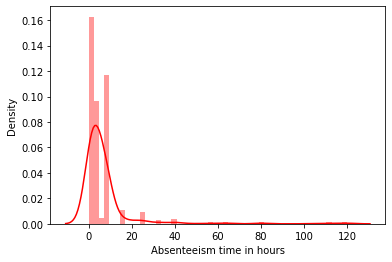

In [ ]:
# import seaborn as sns
# sns.distplot(df['Absenteeism time in hours'], color='red')

In [ ]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Averageperday', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'season_name', 'month_name',
       'Education_detail'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


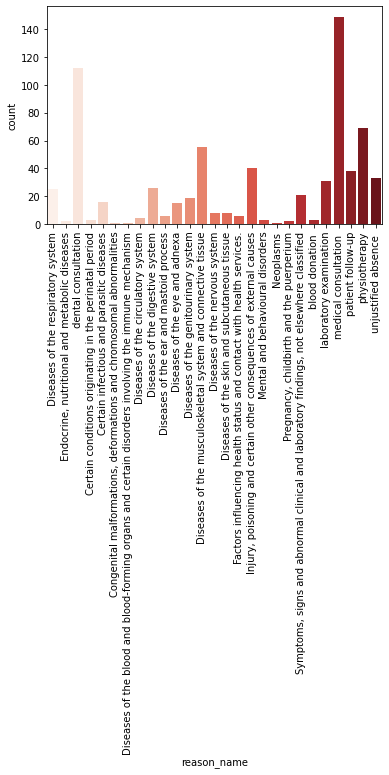

In [ ]:
ax = sns.countplot(df['reason_name'], palette = 'Reds')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.savefig('Reasons_New.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, ''),
 Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

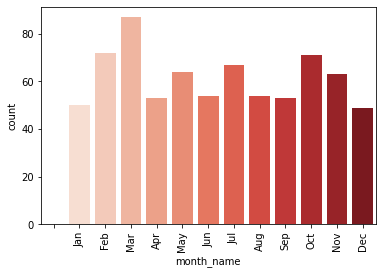

In [ ]:
ax = sns.countplot(df['month_name'], palette = 'Reds')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Averageperday', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'season_name', 'month_name',
       'Education_detail', 'day_name'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday')]

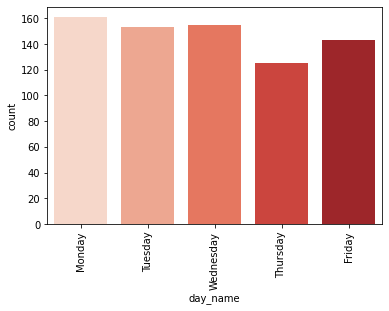

In [ ]:
ax = sns.countplot(df['day_name'], palette = 'Reds')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Summer'),
 Text(0, 0, 'Autumn'),
 Text(0, 0, 'Winter'),
 Text(0, 0, 'Spring')]

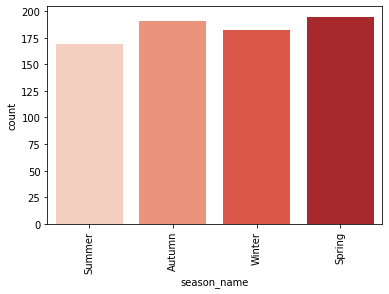

In [ ]:
ax = sns.countplot(df['season_name'], palette = 'Reds')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


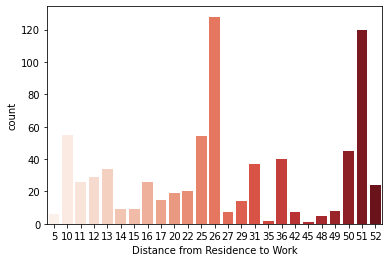

In [ ]:
# sns.countplot(df['Distance from Residence to Work'], palette = 'Reds')

In [ ]:
# df['Seasons'].value_counts()

4    195
2    192
3    183
1    170
Name: Seasons, dtype: int64

In [ ]:
# df['Month of absence'].value_counts()

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64